In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week9/Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


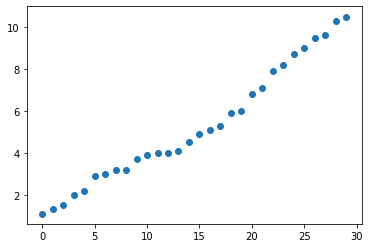

In [5]:
plt.scatter(range(len(data['YearsExperience'])), data['YearsExperience'])

In [7]:
X = data['YearsExperience'].values
y = data['Salary'].values

In [8]:
X = np.reshape(X,(len(X),1))
y = np.reshape(y,(len(y),1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
algos = {'DecisionTreeRegressor':DecisionTreeRegressor(), 'RandomForestRegressor':RandomForestRegressor(), 
         'Support Vector Regressor':SVR(), 'Linear Regression':LinearRegression()}

In [13]:
def models(X_train,y_train, X_test, y_test):
    t = PrettyTable(['Classifier', 'RMSE'])
    
    for key, value in algos.items():
        model = value
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        print()

        print(key.upper(), '\n')
        t.add_row([key, np.sqrt(mean_squared_error(y_test, y_pred))])
        print('MAE : {}'.format(mean_absolute_error(y_test, y_pred)))
        print('MSE : {}'.format(mean_squared_error(y_test, y_pred)))
        print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
        print('\n')
        print('-' * 100)
    print(t)


In [14]:
models(X_train, y_train, X_test, y_test)


DECISIONTREEREGRESSOR 

MAE : 6839.9
MSE : 75437906.3
RMSE : 8685.499772609519


----------------------------------------------------------------------------------------------------

RANDOMFORESTREGRESSOR 

MAE : 5320.08
MSE : 45061573.879999995
RMSE : 6712.791809672038


----------------------------------------------------------------------------------------------------

SUPPORT VECTOR REGRESSOR 

MAE : 30729.110480001335
MSE : 1375582165.1716282
RMSE : 37088.841518327696


----------------------------------------------------------------------------------------------------

LINEAR REGRESSION 

MAE : 3426.4269374307123
MSE : 21026037.329511296
RMSE : 4585.4157204675885


----------------------------------------------------------------------------------------------------
+--------------------------+--------------------+
|        Classifier        |        RMSE        |
+--------------------------+--------------------+
|  DecisionTreeRegressor   | 8685.499772609519  |
|  RandomForestReg